<a href="https://colab.research.google.com/github/k-washi/pytorch-practice/blob/master/a_60_minute_blitz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function
import torch
torch.__version__

'1.4.0'

In [2]:
x = torch.empty(5, 3)
print(x)

x = torch.rand(5, 3)
print(x)

x = torch.zeros(5, 3, dtype=torch.long)
print(x)

x = torch.tensor([5.5, 3])
print(x)

x = x.new_ones(5, 3, dtype=torch.double)
print(x)

x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[3.1262e-35, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 2.8026e-45],
        [0.0000e+00, 1.1210e-44, 0.0000e+00],
        [1.4013e-45, 0.0000e+00, 0.0000e+00]])
tensor([[0.4884, 0.5085, 0.2932],
        [0.7791, 0.1470, 0.7825],
        [0.7798, 0.3897, 0.3517],
        [0.1997, 0.7601, 0.1170],
        [0.2697, 0.4097, 0.8162]])
tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])
tensor([5.5000, 3.0000])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[-0.9095, -0.7962,  0.7633],
        [ 1.1613, -0.1816, -0.0486],
        [ 0.3529, -0.5952, -2.1351],
        [-0.0761, -0.0132, -0.2604],
        [-1.1123,  0.0780, -0.6390]])


In [3]:
print(x[:, 1])

tensor([-0.7962, -0.1816, -0.5952, -0.0132,  0.0780])


In [4]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [5]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([0.1601])
0.16012445092201233


In [6]:
a = torch.ones(5)
print(a)

b = a.numpy()
print(b)

a.add_(1)
print(a)
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [7]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)

np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [9]:
if torch.cuda.is_available():
  device = torch.device("cuda")
  print(device)
  y = torch.ones_like(x, device=device)
  x = x.to(device)
  z = x + y
  print(z)
  print(z.to("cpu", torch.double))


cuda
tensor([1.1601], device='cuda:0')
tensor([1.1601], dtype=torch.float64)


In [17]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

y = x + 2
print(y)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [18]:
z = y * y* 3
out = z.mean()
print(z, out)
out.backward()

print(x.grad)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)
tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [12]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


In [27]:
x = torch.randn(3, requires_grad = True)
y = x * 2

while y.data.norm() < 1000:
  y = y * 2

print(y)

v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)
print(x.grad)

print(x.requires_grad)
print((x ** 2).requires_grad)


with torch.no_grad():
  print((x**2).requires_grad)

y = x.detach()  # gradientをなしにする2
print(y.requires_grad)
print(x.eq(y).all())

tensor([-1602.3284,  -618.2700,   917.5085], grad_fn=<MulBackward0>)
tensor([2.0480e+02, 2.0480e+03, 2.0480e-01])
True
True
False
False
tensor(True)


In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [32]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()

    self.conv1 = nn.Conv2d(1, 6, 3)
    self.conv2 = nn.Conv2d(6, 16, 3)

    self.fc1 = nn.Linear(16 * 6 * 6, 120) # 6 * 6 from image dimension batch
    self.fc2 = nn.Linear(120,  84)
    self.fc3 = nn.Linear(84, 10)
  
  def forward(self, x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
    x = F.max_pool2d(F.relu(self.conv2(x)), 2) #うえと同じ window
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
  
  def num_flat_features(self, x):
    size = x.size()[1:]
    num_features = 1
    for s in size:
      num_features *= s
    return num_features

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [38]:

params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight
print(params[1].size())
print(params[2].size())


10
torch.Size([6, 1, 3, 3])
torch.Size([6])
torch.Size([16, 6, 3, 3])


In [45]:
input = torch.randn(1, 1, 32, 32) # or example, nn.Conv2d will take in a 4D Tensor of nSamples x nChannels x Height x Width.
out = net(input)
print(out)

torch.Size([16, 6, 6])
tensor([[-0.0281,  0.1117, -0.0592, -0.0432,  0.1022, -0.0557,  0.0641, -0.1257,
          0.0256, -0.0866]], grad_fn=<AddmmBackward>)


In [0]:
net.zero_grad()
out.backward(torch.randn(1, 10))

In [58]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

torch.Size([16, 6, 6])
tensor(0.8379, grad_fn=<MseLossBackward>)
conv1.bias.grad before backward
tensor([-0.1827,  0.0078, -0.0158,  0.0772,  0.0601,  0.0188])
conv1.bias.grad after backward
tensor([-0.1851,  0.0101, -0.0176,  0.0829,  0.0536,  0.0266])


In [51]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

In [0]:
learning_rate = 0.01
for f in net.parameters():
  f.data.sub_(f.grad.data * learning_rate)

In [60]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

torch.Size([16, 6, 6])


In [0]:
import torch
import torchvision
import torchvision.transforms as transforms



In [62]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [0]:
import matplotlib.pyplot as plt
import numpy as np


(3, 36, 138)


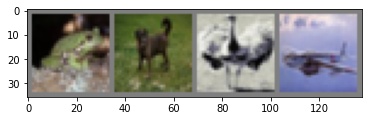

 frog   dog  bird plane


In [73]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    print(npimg.shape)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [94]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [95]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [99]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.215
[1,  4000] loss: 1.204
[1,  6000] loss: 1.202
[1,  8000] loss: 1.171
[1, 10000] loss: 1.194
[1, 12000] loss: 1.164
[2,  2000] loss: 1.112
[2,  4000] loss: 1.088
[2,  6000] loss: 1.095
[2,  8000] loss: 1.109
[2, 10000] loss: 1.087
[2, 12000] loss: 1.095
Finished Training


In [0]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

(3, 36, 138)


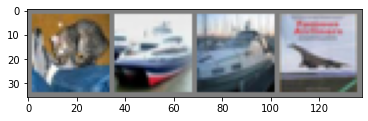

GroundTruth:    cat  ship  ship plane


In [82]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [104]:
net = Net()
net.to(device)
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [108]:
outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   frog  ship  ship  ship


In [106]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 57 %


In [109]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze() # torch.Size
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 68 %
Accuracy of   car : 76 %
Accuracy of  bird : 38 %
Accuracy of   cat : 42 %
Accuracy of  deer : 58 %
Accuracy of   dog : 51 %
Accuracy of  frog : 68 %
Accuracy of horse : 50 %
Accuracy of  ship : 84 %
Accuracy of truck : 37 %
